In [2]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

from typing import Annotated
from langgraph.graph.message import add_messages

In [3]:
class State(TypedDict):
    messages:Annotated[list, add_messages]

In [4]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [6]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model = "gpt-4o-mini")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'id': 'chatcmpl-BpN4RWy1J8WfiusCbLbgKW5pgMsFm', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--b38032a3-b836-4f66-8393-4b03772d6827-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [9]:
from langchain_groq import ChatGroq

llm_groq = ChatGroq(model = "qwen-qwq-32b")
llm_groq.invoke("Hey I need to play cricket")

AIMessage(content='\n<think>\nOkay, the user wants to play cricket. Let me think about how to help them.\n\nFirst, I should consider if they have a place to play. Cricket needs a suitable area, maybe a park or backyard. If not, maybe suggest alternatives like indoor cricket or a smaller version.\n\nThey might need equipment. The basics are a bat, ball, wickets, stumps, and bails. If they don\'t have these, maybe recommend substitutes. For example, a soft ball for safety, or using items around the house for wickets.\n\nNumber of players is another point. A full game has 11 each, but for casual play, fewer can work. Maybe suggest a friendly match with 4-6 players each, or even a solo practice session.\n\nRules are important. They might not know the basics, so a quick overview would help: batting, bowling, fielding, scoring runs, outs. Maybe mention common ways to get out like getting bowled, caught, or run out.\n\nSafety is key, especially if they\'re playing in a small space. Emphasize 

In [10]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}


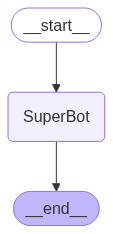

In [11]:
graph = StateGraph(State)
graph.add_node("SuperBot", superbot)

##Edges
graph.add_edge(START, "SuperBot")
graph.add_edge("SuperBot", END)

graph_builder= graph.compile()

#Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [12]:
graph_builder.invoke({'messages':"Hi, My name is Ali and I like cricket"})

{'messages': [HumanMessage(content='Hi, My name is Ali and I like cricket', additional_kwargs={}, response_metadata={}, id='8014b187-e8f1-4d50-9ef0-9fa84cc6a0be'),
  AIMessage(content="\n<think>\nOkay, so Ali just introduced himself and mentioned he likes cricket. I need to respond in a friendly way. Let me start by greeting him back. I should acknowledge his name and his interest in cricket. Maybe ask how he got into the sport or if he has a favorite team or player? That should keep the conversation going. I should also make sure to be enthusiastic to show genuine interest. Let me check if there's anything else I should consider. Oh right, maybe mention that cricket is a popular sport worldwide, so that connects with his interest. I should avoid making it too long, keep it conversational. Alright, let's put that together.\n</think>\n\nHi Ali! Nice to meet you! That's great that you like cricket—what a thrilling sport! Do you have a favorite team or player? And are you into playing, wa

In [15]:
for event in graph_builder.stream({'messages':"Hello my name is Ali"}, stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='Hello my name is Ali', additional_kwargs={}, response_metadata={}, id='acbfa815-dbee-45a2-94ba-04102019938c')]}
{'messages': [HumanMessage(content='Hello my name is Ali', additional_kwargs={}, response_metadata={}, id='acbfa815-dbee-45a2-94ba-04102019938c'), AIMessage(content='\n<think>\nOkay, the user said "Hello my name is Ali." I need to respond appropriately. First, I should greet them back. Maybe say hello and mention their name to make it personal. I should keep it friendly and open-ended so they feel comfortable continuing the conversation. Let me think of a simple response like, "Hello Ali! Nice to meet you. How can I assist you today?" That sounds good. It\'s friendly, acknowledges their name, and invites them to state their needs. I should check for any typos or errors. Nope, looks good. Alright, that should work.\n</think>\n\nHello Ali! Nice to meet you. How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': 